# Assignment 1
* **Chae, Jimin(2021323133)**

# Setup

## Import

In [1]:
import pandas as pd
import numpy as np
import math
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
data_file = 'Pdata.csv'

In [3]:
data_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_모빌리티데이터분석및활용/dataset'

In [4]:
data_path = os.path.join(data_dir, data_file)
print(data_path)

D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_모빌리티데이터분석및활용/dataset\Pdata.csv


In [5]:
data = pd.read_csv(data_path)

## Data Structure

In [6]:
data.head(3)

,HH_ID,HHsize,HHsize5,Dcode,Thouse,HHinc,Ncars,P_ID,Byear,Gender,Licence,Job,Workdays,Trip_made,NofTrips,TripTime,Work_TT,Work_AD,Shop_TT,Shop_AD
0,4889,2,2,1138060000,1,4,1,1,1980,1,1,4,2.0,1,2,100.0,60,810,0,0
1,4889,2,2,1138060000,1,4,1,2,1980,2,1,4,2.0,1,2,60.0,30,660,0,0
2,4918,4,3,1138060000,1,4,1,1,1972,1,1,4,2.0,1,2,85.0,45,715,0,0


In [7]:
data.columns # Columns of Pdata.csv

Index(['HH_ID', 'HHsize', 'HHsize5', 'Dcode', 'Thouse', 'HHinc', 'Ncars',
       'P_ID', 'Byear', 'Gender', 'Licence', 'Job', 'Workdays', 'Trip_made',
       'NofTrips', 'TripTime', 'Work_TT', 'Work_AD', 'Shop_TT', 'Shop_AD'],
      dtype='object')

# Q1 (20 points)
We are going to investigate how the car-ownership affects the number of trips generated by person. Do people who own a car generate more trips than others? Please answer this question by creating a pivot table

## (1) Make Pivot Table

In [8]:
def car_ownership(Ncars):
    """
    This functhion Label by using 'Ncar' column value.
    1 :: Car Owner
    2 :: Non-Owner
    """

    if Ncars == 1:
        return 'Own'
    
    elif Ncars == 2:
        return 'Non-own'
    
    else:
        pass

In [9]:
data['Car Ownership'] = data['Ncars'].apply(car_ownership)

In [10]:
pivot_1 = pd.pivot_table(data, index = 'Car Ownership', values = 'NofTrips', aggfunc = 'mean')

In [11]:
pivot_1

,NofTrips
Car Ownership,
Non-own,1.822640
Own,2.027216


## (2) Draw Bar Graph

In [12]:
car_ownership = pd.Series(data = pivot_1['NofTrips'], index = pivot_1.index)

In [13]:
car_ownership

Car Ownership
Non-own    1.822640
Own        2.027216
Name: NofTrips, dtype: float64

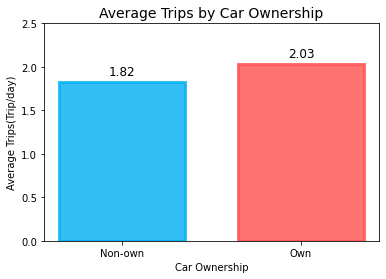

In [14]:
color_theme = ['#00b0f0', '#ff5050']

fig = plt.figure()

axis = fig.add_subplot(1, 1, 1)

axis.bar(
    x = car_ownership.index, 
    height = car_ownership.values,
    color = color_theme,
    alpha = 0.8,
    edgecolor = color_theme,
    linewidth = 3,
    width = 0.7
)

plt.ylim([0, 2.50])

for i in range(len(car_ownership.index)):
    height = car_ownership.values[i]
    plt.text(car_ownership.index[i], height + 0.05, '%.2f' %height, ha = 'center', va = 'bottom', size = 12)


# Graph Title and Label Settig
axis.set_title('Average Trips by Car Ownership', fontsize = 14)
axis.set_xlabel('Car Ownership')
axis.set_ylabel('Average Trips(Trip/day)')

# Show Graph
plt.show()

## (3) Interpretatation
* According to Pdata.csv, each car owners tend to generate more trips than non-owners on average.
* Car owners generate 2.03 trips per day, But non-owners generate 1.82 trips per day, averagily.

# Q2 (30 points)
- (1) Draw Kernel density distributions of total travel time for a day by the car-ownership
- (2) Interpret the results - how does the distibutions differ? and what does the difference stand for?

* 통행횟수가 0인 경우, 통행을 하지 않았으므로 통행시간 산정 시 해당 관측치들을 제외해야 할 것이다.
* ”0”과 누락값, NaN은 분명히 다른 값임에 유의한다. : 통행시간이 0이라면 순간이동한 거겠지? ㅋㅋㅋ

## (1) Draw Kernel Density Distributions

In [15]:
data.head(3)

,HH_ID,HHsize,HHsize5,Dcode,Thouse,HHinc,Ncars,P_ID,Byear,Gender,...,Job,Workdays,Trip_made,NofTrips,TripTime,Work_TT,Work_AD,Shop_TT,Shop_AD,Car Ownership
0,4889,2,2,1138060000,1,4,1,1,1980,1,...,4,2.0,1,2,100.0,60,810,0,0,Own
1,4889,2,2,1138060000,1,4,1,2,1980,2,...,4,2.0,1,2,60.0,30,660,0,0,Own
2,4918,4,3,1138060000,1,4,1,1,1972,1,...,4,2.0,1,2,85.0,45,715,0,0,Own


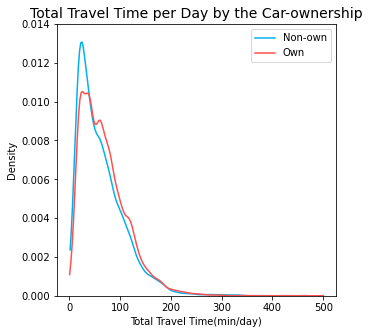

In [16]:
# Drawing Kernel Density Curve

fig, ax = plt.subplots(figsize = (5 , 5))

sns.histplot(ax = ax,
             data = data[data['Car Ownership'] == 'Non-own'], 
             x = 'TripTime', stat = 'density', bins = 50, kde = True,
             color = color_theme[0], alpha = 0, edgecolor = 'White')

sns.histplot(ax = ax,
             data = data[data['Car Ownership'] == 'Own'], 
             x = 'TripTime', stat = 'density', bins = 50, kde = True,
             color = color_theme[1], alpha = 0.0, edgecolor = 'White')

plt.ylim([0, 0.014])

# Graph Title and Label Settig
ax.set_title('Total Travel Time per Day by the Car-ownership', fontsize = 14)
ax.set_xlabel('Total Travel Time(min/day)')
ax.set_ylabel('Density')

# Add legend
plt.legend(labels = car_ownership.index)

# Show Graph
plt.show()

In [ ]:
# Solution
sns.displot(data = Pdata, x = 'TripTime', hue = 'Ncars', kind = 'kde')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# distplot은 displot과 달리, 두 개 이상의 그래프를 1개 플롯에 오버랩할 수 있게 함. KDEplot, histplot, 별의별거 다써도 됨
ax = sns.distplot(data = Pdata[Pdata['Ncars'] == 1]['Triptime'], kind = 'kde')

## (2) Interpretation
* According to the kernel density plot, Car owners total travel time is tend to be slightly higher than non-owners.
* A peak point of Non-owners total travel time is about 40 min per day. if total travel time is increased from peak point, the curve is rapidly decrease from peak point density value.

# Q3 (50 points)
Aging society is one of the biggest issues all over the world. Many urban and transportation planners try to forecast travel demand in aging society. The travel demand can be measured by the number of trips (i.e. frequency) and the total amount of travel time (i.e. length). The aging society might mean not only "longer life" but also "later retirement". In this context, we are going to analze relationships among travel demand, age, and employment status.
- (1) Draw a line plot to compare the average in the number of trips for a day by different age groups and employment status. Age groups should be classified into 6 groups including "under or equal to 10s", "20s", "30s", "40s", "50s", and "equal to or over 60s". In addition, employment status should be classified into 2 categories: "Employed" and "Unemployed" (hint: the lecture script already provides the script for the answer.)
- (2) Draw a line plot to compare the average in the total travel time for a day by different age groups and employment status.
- (3) Based on the results (1) and (2), what is your expectation and forecast of travel demand in aging society - how will possibly the travel demand be changed? Will it be increased or decreased? or having another pattern?

## (1) Lineplot : Number of Trips
* **the average in Number of Trips for a day by different age groups and employment status**
* Classify each observation by Age groups
* Draw a line plot to compare the average in number of trips for a day by different age roups and employment status
* Employment status : 'Employed' / 'Unemployed'
* Age group : under or equal to 10s / 20s / 30s / 40s / 50s / equal to or over 60s

### i. Classify Observations
* By age group
* By employment status

In [17]:
def age_group(Byear):
    """
    By using 'Byear' column, This function classify age group for each observations.
    age = 2022 - Byear
    """
    
    age = 2022 - Byear
    
    if age < 20:
        return '≤10s'
    
    elif age >= 20 and age < 30:
        return '20s'
    
    elif age >= 30 and age < 40:
        return '30s'
    
    elif age >= 40 and age < 50:
        return '40s'
    
    elif age >= 50 and age < 60:
        return '50s'
    
    elif age >= 60:
        return '60s≤'
    
    else:
        pass

In [18]:
def employment_group(Job):
    """
    By using 'Job' column, This function classify each observations to Employed or unemployed.
    Employed : 1, 2, 3, 4, 5, 6, 7, 9
    Unemployed : 8
    """
    
    Employed = [1, 2, 3, 4, 5, 6, 7, 9]
    
    if Job in Employed:
        return 'Employed'
    
    elif Job == 8:
        return 'Unemployed'
    
    else:
        pass

In [19]:
data['Age Group'] = data['Byear'].apply(age_group)

In [20]:
data['Employment Status'] = data['Job'].apply(employment_group)

### ii. Make Pivot Table

In [21]:
pivot_2 = pd.pivot_table(data, index = 'Age Group', columns = 'Employment Status', values = 'NofTrips', aggfunc = 'mean', margins = True)

In [22]:
pivot_2

Employment Status,Employed,Unemployed,All
Age Group,,,
20s,2.083333,2.218310,2.204949
30s,2.083113,1.538106,1.995936
40s,2.063982,1.015152,2.038560
50s,2.077756,1.015873,2.052492
60s≤,1.899298,1.250689,1.722564
≤10s,NaN,2.710024,2.710024
All,2.006790,1.831284,1.959366


### iii. Draw Lineplot

In [23]:
color_theme_2 = ['#FF8352', '#00E1DF', '#Dee500']

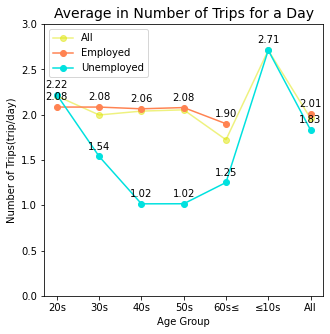

In [24]:
fig1, ax = plt.subplots(figsize = (5 , 5))

plt.ylim(0, 3.0)

ax.plot(pivot_2['All'], color = color_theme_2[2], marker = 'o', alpha = 0.5)
ax.plot(pivot_2['Employed'], color = color_theme_2[0], marker = 'o')
ax.plot(pivot_2['Unemployed'], color = color_theme_2[1], marker = 'o')

for x, y in zip(pivot_2.index, pivot_2['Employed']):
    plt.annotate('{:.2f}'.format(y), (x, y), textcoords = 'offset points', xytext = (0, 7), ha = 'center')
    
for x, y in zip(pivot_2.index, pivot_2['Unemployed']):
    plt.annotate('{:.2f}'.format(y), (x, y), textcoords = 'offset points', xytext = (0, 7), ha = 'center')
    
# Add legend
ax.legend(labels = ['All', 'Employed', 'Unemployed'])

# Graph Title and Label Settig
ax.set_title('Average in Number of Trips for a Day', fontsize = 14)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Trips(trip/day)')

# Show Graph
plt.show()

## (2) line Plot : Total Travel time
* **Average in Total Travel time by age groups and employment status**
* Draw a line plot to compare the average in the total travel time for a day by different age groups and employment status.

### i. Make Pivot Table

In [25]:
pivot_3 = pd.pivot_table(data, index = 'Age Group', columns = 'Employment Status', values = 'TripTime', aggfunc = 'mean', margins = True)

In [26]:
pivot_3 = pivot_3.reindex(['≤10s', '20s', '30s', '40s', '50s', '60s≤'])

In [27]:
pivot_3

Employment Status,Employed,Unemployed,All
Age Group,,,
≤10s,NaN,37.942515,37.942515
20s,80.960265,77.110345,77.509615
30s,83.201779,87.253333,83.700739
40s,76.333059,58.656250,76.103210
50s,70.496215,45.741935,70.177667
60s≤,56.490301,51.987452,55.586240


### ii. Draw Lineplot

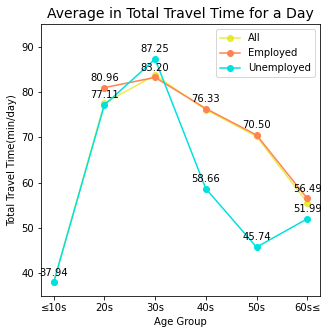

In [28]:
fig2, ax2 = plt.subplots(figsize = (5 , 5))

plt.ylim(35, 95)

ax2.plot(pivot_3['All'], color = color_theme_2[2], marker = 'o', alpha = 0.7)
ax2.plot(pivot_3['Employed'], color = color_theme_2[0], marker = 'o')
ax2.plot(pivot_3['Unemployed'], color = color_theme_2[1], marker = 'o')

for x, y in zip(pivot_3.index, pivot_3['Employed']):
    plt.annotate('{:.2f}'.format(y), (x, y), textcoords = 'offset points', xytext = (0, 7), ha = 'center')
    
for x, y in zip(pivot_3.index, pivot_3['Unemployed']):
    plt.annotate('{:.2f}'.format(y), (x, y), textcoords = 'offset points', xytext = (0, 7), ha = 'center')
    
# Add legend
ax2.legend(labels = ['All', 'Employed', 'Unemployed'])

# Graph Title and Label Settig
ax2.set_title('Average in Total Travel Time for a Day', fontsize = 14)
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Total Travel Time(min/day)')

# Show Graph
plt.show()

In [40]:
len(data[data['Employment Status'] == 'Employed'])/len(data)

0.7297848772809421

### iv. Make Pivot Table
* Respondent Count of Dataset

In [29]:
pivot_4 = pd.pivot_table(data, index = 'Age Group', columns = 'Employment Status', values = 'P_ID', aggfunc = 'count', margins = True)

In [30]:
pivot_4 = pivot_4.reindex(['≤10s', '20s', '30s', '40s', '50s', '60s≤'])

In [31]:
pivot_4 # Respondent Count 

Employment Status,Employed,Unemployed,All
Age Group,,,
≤10s,NaN,838.0,838
20s,156.0,1420.0,1576
30s,2274.0,433.0,2707
40s,2657.0,66.0,2723
50s,2585.0,63.0,2648
60s≤,4846.0,1815.0,6661


## (3) Expectation and Forecast

### ii. Expectation and forecast
* **`Introduction`**
    * A lime-colored line in the lineplot is for total respondents. It shows each age group's Number of trips and Total Travel time on average.
    * A orange-colored line is for 'Employed' respondents. And a cyan-colored line is for 'Unemployed' respondents.
    * About 73.0% of the respondents is 'Employed'. So, trend of average Number of trip and Total travel time for total respondent have similar distribution with Employed's one.
* **`Average Number of Trips for a Day`**
    * In case of 'Employed' respondent, their average number of trips per a day by average group is almost same with each other(2.06~2.08). But for equal to or over than 60s, their average number of trips for a day is decreased to 1.90.
    * In case of 'Unemployed' respondent, increasing the age group, the average number of trips per a day by average group is decreasing. But for equal to or over than 60s, thos values are slightly increase to 1.25 times per a day.
    * A distribution of daily number of trips for all respondent is tend to be similar with 'Employed' respondents(Because, about 73.0% of the respondents are 'Employed'). So, Number of trips is decreasing as age is increasing.
* **`Average Total Travel Time for a Day`**
    * The trend of total respondents is similar to that of 'Employed'. Except for the slight difference in the '20s', it can be seen that the lime-colored line and the orange-colored line overlap in other age groups.
    * For both 'Unemployed' and 'Employed', the average total travel time is the highest for respondents in their 30s.
    * In the case of 'Unemployed', the average total travel time increases until the 30s, then decreases the most from the 40s to the 50s, showing the minimum value in the 50s (45.74 minutes), and showing a slight increase in the equal to or over 60s(51.99 minutes).
    * In the case of 'Employed', the average travel time steadily decreases from those in their 30s to those in their 60s, and the decrease is greatest after those in their 50s.
* **`Expected Result`**
    * According to the analysis results, the average daily total travel time and the average daily number of trips tend to decrease as the age group increases. 
    * In other words, as the age increases, the demand for travel decreases on average.
    * If the travel demand and employment trends of the given data are maintained, the total number of trips and total travel time will decrease if the society is aging.
    * However, even in the same age group, the daily total travel time and the number of trips increase for the Unemployed compared to the Employed. 
    * Therefore, if the proportion of the unemployed elderly increases compared to now, the travel demand of the aging population may rise.